In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from scipy import stats
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline


1. BINOMIAL DISTRIBUTION 
binomial distribution is a discrete probility distribution and has several applications in many business contexts . A random variable X is said to follow a binomial distibution when :
-> The random variable can have only two outcomes - success and failure (also known as bernouili trials).
-> The objective is to find the probility of getting X success out of n trials 
-> The probility of success is P and thus the probility of failure is (1-P)
-> The probility P is constant and does not change between trials 

Success and failure are generic terminoligies  used in binomial distribution , based on the context we will interpret success and failure . Few examples of business problems with two possible outcomes are as follows  

-----------------------------------------------------------------------------------------------------------------------------------------------------

Probability that exactly 5 customers will return the items 

In [31]:
stats.binom.pmf(5,20,0.1)

0.03192136111995444

Text(0.5, 0, 'number of items returned')

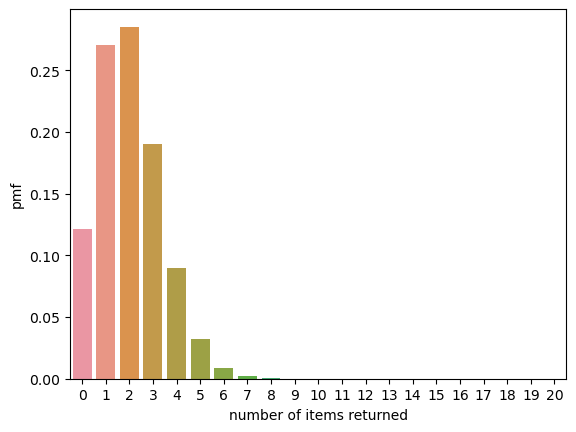

In [32]:
pmf_df = pd.DataFrame({'success':range(0,21),'pmf':list(stats.binom.pmf(range(0,21),20,0.1))})
sn.barplot(x=pmf_df.success , y=pmf_df.pmf)
plt.ylabel('pmf')
plt.xlabel('number of items returned')

Probability that Maximum 5 customers will return the items 

In [33]:
stats.binom.cdf(5,20,0.1)

0.988746865835491

Probability that more than  5 customers will return the items  purchased by them 

In [34]:
1- stats.binom.cdf(5,20,0.1)

0.011253134164509015

Average number of customers who are likely to return the items and the varience and the standerd deviation of the number of returns.
(A) Average of a binomial distribution is given by N*P
(B) Variable of the binomial distribution is given by N*P*(1-P) 

In [35]:
mean, var = stats.binom.stats(20,0.1)
print("Average :",mean,"Variance:",var)

Average : 2.0 Variance: 1.8


2. POISSION DISTRIBUTION

-----------------------------------------------------------------------------------------------------------------------------------------------------

in many situations , we may be interested in calculating the number of events that may occur over a period of time or space . For Example , number of cancellation of orders by customers at an e-commerce portal,number of customer complaints , number of cash withdrawals at an ATM , number of typographical errors in a book, number of potholes on banglore roads, etc . To find the probility of numbers of events , we use Poission distribution 

In [36]:
#Calculate the probability that a maximum of 5 cells will arrive at the cell center. 
stats.poisson.cdf(5,10)

0.06708596287903189

In [37]:
# Calculate the probabilty that the number of cells over a 3- hour period will exceed 30.
1 - stats.poisson.cdf(30,30)

0.45164848742208863

To visualize the poisson distribution for the average calls per hour as 10,we can plot PMF for all possible number of cells the call center can receive ranging from 0 to 30 . we will create a DataFrame which will contain the number of cells ranging from 0 to 30 in one column named success and the corresponding PMFs in another column named pmf. The plotting is done using barplot in seaborn liberary.

Text(0.5, 0, 'number of cells received')

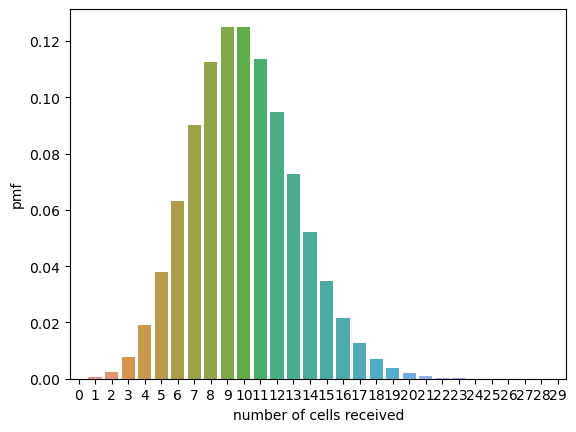

In [38]:
pmf_df = pd.DataFrame({'success':range(0,30),'pmf':list(stats.poisson.pmf(range(0,30),10))})
sn.barplot(x=pmf_df.success, y = pmf_df.pmf)
plt.xlabel('number of cells received')

3. EXPONENTIAL DISTRIBUTION 

-----------------------------------------------------------------------------------------------------------------------------------------------------

exponential distribution is a single parameter continues distribution that is traditionally used for modeling time to failure of electronic components. the exponential distribution represents a process in which events occur continuosly and independently at a contant average rate 
/--\
Example 
-> the probability that the system will fail before 1000 hours 
-> the probability that it will not fail up to 2000 hours 

In [39]:
# Calculate the probability that the system will fail before 1000 hours.
stats.expon.cdf(1000,loc=1/1000,scale=1000)

0.6321201909489326

In [40]:
# calculate the probability that it will not fail up to 2000 hours.
1-stats.expon.cdf(2000,loc=1/1000,scale=1000)

0.13533541857196352

In [41]:
#Calculate the time by which 10% of the system will fail (i.e, calculate P10 life).
stats.expon.ppf(0000.1,loc=1/1000,scale=1000)

105.36151565782632

Text(0.5, 0, 'time to failure')

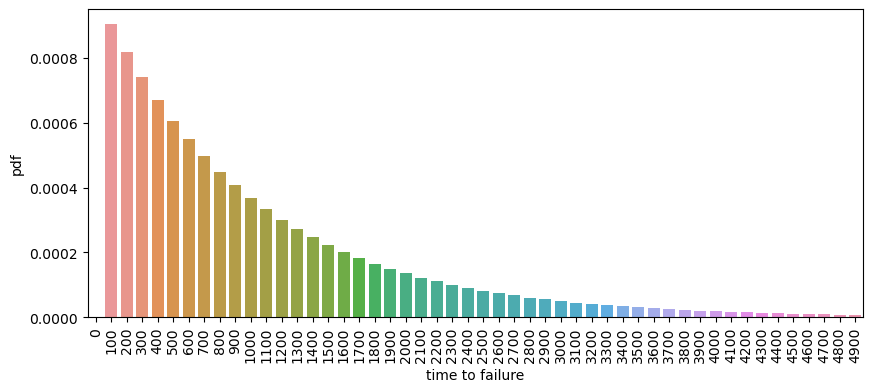

In [42]:
pmf_df =pd.DataFrame({'success':range(0,5000,100),'pdf':
    list(stats.expon.pdf(range(0,5000,100),
                         loc=1/1000,
                         scale=1000))})
plt.figure(figsize=(10,4))
sn.barplot(x=pmf_df.success,y=pmf_df.pdf)
plt.xticks(rotation=90)
plt.xlabel('time to failure')

4. Normal Distribution 

-----------------------------------------------------------------------------------------------------------------------------------------------------

Normal distribution also known as gaussian distribution , is one of the most popular continues distribution in the field of analytics especially due to its use in  multiple contexts . Normal distribution is observed across many naturally occuring measures such as age , salary salesvolume , birth weigt, height etc . it is also popularity known as bell curve (as it shaped like a bell)
  

In [43]:
beml_df= pd.read_csv('/Users/manishswami/Desktop/DATA-SCIENCE/archive/BEML.csv')
beml_df[0:10]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42
5,2010-01-11,1154.0,1159.45,1134.10,1140.1,1137.00,58910.0,674.55
6,2010-01-12,1150.0,1156.90,1117.05,1141.1,1143.65,113364.0,1296.07
7,2010-01-13,1130.0,1156.80,1125.00,1138.3,1142.25,55644.0,634.85
8,2010-01-14,1148.5,1168.50,1145.15,1148.0,1148.20,94256.0,1084.88
9,2010-01-15,1159.9,1232.00,1151.00,1205.0,1207.05,491686.0,5937.04


In [44]:
glaxo_df = pd.read_csv('/Users/manishswami/Desktop/DATA-SCIENCE/archive/GLAXO.csv')
glaxo_df[0:10]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.00,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.00,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.00,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.00,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.00,1639.80,28035.0,459.11
5,2010-01-11,1659.00,1694.95,1601.05,1630.00,1629.45,10566.0,173.40
6,2010-01-12,1630.00,1635.00,1578.00,1592.00,1583.85,47274.0,756.75
7,2010-01-13,1592.00,1605.90,1566.00,1568.00,1571.30,20709.0,327.53
8,2010-01-14,1580.00,1595.00,1562.40,1572.20,1573.55,13453.0,212.09
9,2010-01-15,1581.10,1585.00,1565.00,1565.15,1570.40,6408.0,101.06


In [45]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]
beml_df[0:10]

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
5,2010-01-11,1137.00
6,2010-01-12,1143.65
7,2010-01-13,1142.25
8,2010-01-14,1148.20
9,2010-01-15,1207.05


In [46]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [47]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


Text(0, 0.5, 'close price')

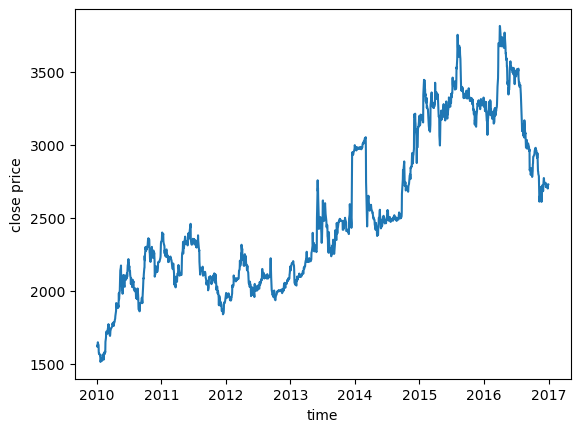

In [48]:
plt.plot(glaxo_df['Close'])
plt.xlabel('time')
plt.ylabel('close price')


Text(0, 0.5, 'Close')

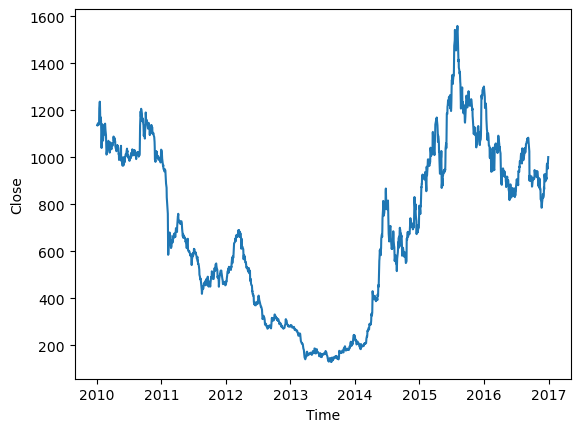

In [49]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

In [50]:
glaxo_df['gain']=glaxo_df.Close.pct_change(periods=1)
beml_df['gain']=beml_df.Close.pct_change(periods=1)
print(glaxo_df.head(10))
print(beml_df.head(10))

                  Date    Close      gain
Date                                     
2010-01-04  2010-01-04  1625.65       NaN
2010-01-05  2010-01-05  1616.80 -0.005444
2010-01-06  2010-01-06  1638.50  0.013422
2010-01-07  2010-01-07  1648.70  0.006225
2010-01-08  2010-01-08  1639.80 -0.005398
2010-01-11  2010-01-11  1629.45 -0.006312
2010-01-12  2010-01-12  1583.85 -0.027985
2010-01-13  2010-01-13  1571.30 -0.007924
2010-01-14  2010-01-14  1573.55  0.001432
2010-01-15  2010-01-15  1570.40 -0.002002
                  Date    Close      gain
Date                                     
2010-01-04  2010-01-04  1135.60       NaN
2010-01-05  2010-01-05  1134.60 -0.000881
2010-01-06  2010-01-06  1139.60  0.004407
2010-01-07  2010-01-07  1144.15  0.003993
2010-01-08  2010-01-08  1144.05 -0.000087
2010-01-11  2010-01-11  1137.00 -0.006162
2010-01-12  2010-01-12  1143.65  0.005849
2010-01-13  2010-01-13  1142.25 -0.001224
2010-01-14  2010-01-14  1148.20  0.005209
2010-01-15  2010-01-15  1207.05  0

In [51]:
glaxo_df= glaxo_df.dropna()
beml_df= beml_df.dropna()
beml_df[0:9]

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
2010-01-12,2010-01-12,1143.65,0.005849
2010-01-13,2010-01-13,1142.25,-0.001224
2010-01-14,2010-01-14,1148.20,0.005209
2010-01-15,2010-01-15,1207.05,0.051254


Text(0, 0.5, 'gain')

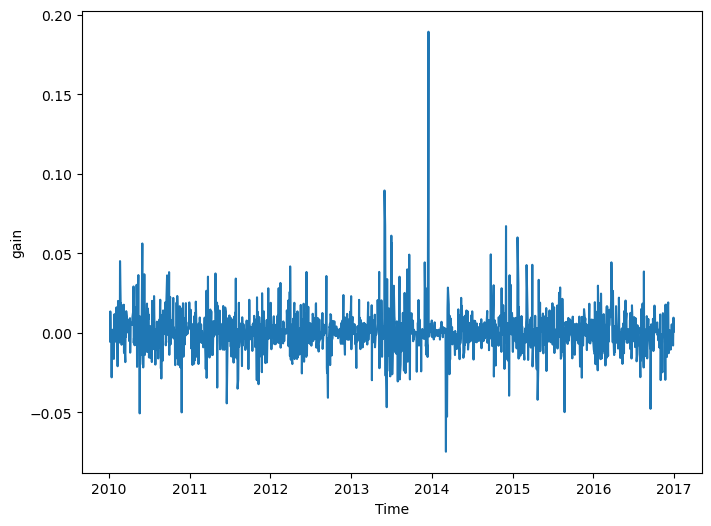

In [52]:
plt.figure(figsize=(8,6))
plt.plot(glaxo_df.index,glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

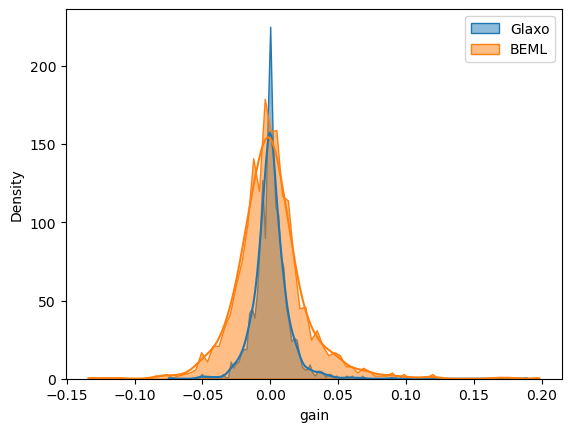

In [53]:
sn.histplot(glaxo_df.gain,label='Glaxo',element='poly',kde=True)
sn.histplot(beml_df.gain, label='BEML',element='poly',kde=True)
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

5. Mean and Variance

-----------------------------------------------------------------------------------------------------------------------------------------------------

The normal distribution is paramererized by two parameters: the mean of the distribution U and the variance a^2. the sample mean of a normal distribution 

The standard deviation is sqaure root of variance and is denoted by a
Methods mean() and std() on DataFrame columns return mean and standard deviation , respectively . mean and Standard deviation for daily return for Glaxo are:

In [54]:
print("Daily gain of Glaxo")
print("-------------------")
print("Mean: ",round(glaxo_df.gain.mean(), 4))
print("Standard Deviation: ", round(glaxo_df.gain.std(), 4))

Daily gain of Glaxo
-------------------
Mean:  0.0004
Standard Deviation:  0.0134


In [55]:
# Mean and standard deviation for daily return for BEML are:
print("Daily gain of BEML")
print("-------------------")
print("Mean: ",round(beml_df.gain.mean(), 4))
print("Standard Deviation: ", round(beml_df.gain.std(), 4))

Daily gain of BEML
-------------------
Mean:  0.0003
Standard Deviation:  0.0264


In [56]:
# The derscibe() method of DataFrame return the detailed statistical summary of a variable.
beml_df.gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

6. Confidence interval 

-----------------------------------------------------------------------------------------------------------------------------------------------------

To find out what is the expected range of return for 95% confidence interval , we need to calculate the values of gain for two standard deviations away from mean on both sides of the distribution , that is (U +- 2a).   

-> alpha : it is the interval , for example 0.9 for 90% confidence interval.
                                                                                                                                                        
-> loc: it is the location parameter of the distribution . it is mean of normal distribution.
                                                                                                                                                    
-> scale: it is the sclae parameter of the distribution .it is standard deviation for normal distribution.


In [57]:
glaxo_df_ci = stats.norm.interval(0.95,loc = glaxo_df.gain.mean(),scale= glaxo_df.gain.std())
print("Gain at 95% confidence interval is: ", np.round(glaxo_df_ci,4))

Gain at 95% confidence interval is:  [-0.0258  0.0266]


The result returned by the method is a tuple . the first value of the tuple is the leftmost value of the interval and second value is the rightmost value of the interval. for 95% confidence interval , gain of glaxo remain between -2.58% and 2.66% 


In [58]:
beml_df_ci = stats.norm.interval(0.95,loc = beml_df.gain.mean(),scale= beml_df.gain.std())
print("Gain at 95% confidence interval is: ", np.round(beml_df_ci,4))

Gain at 95% confidence interval is:  [-0.0515  0.0521]


7. Cumulative Probability Distribution 


-----------------------------------------------------------------------------------------------------------------------------------------------------